# Background

Given the significant threat of climate change to our planet, we have undertaken the task of predicting the average land temperature in the future. To create our models, we have divided the data into three periods, each accounting for the different temperature growth rates observed over nearly three centuries. We have taken into consideration that data from the 18th and 19th centuries may be less reliable due to limitations in measurement technology. As a result, we have developed three separate models to capture these variations. However, predicting future temperatures is a complex task that requires not only accurate data but also a deep understanding of the underlying factors driving temperature changes, such as greenhouse gas emissions.

# Content:
1. [Setup](#1)
2. [EDA](#2)
3. [Trends](#3)
    * [Create a Trend Feature](#3.1)
4. [Linear Regression:](#4)
    * [1750 - 2015](#4.1)
    * [1850 - 2015](#4.2)
    * [1950 - 2015](#4.3)

# <a id="1">Setup</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
temperatures = pd.read_csv('C:/Users/OJASV/Desktop/GlobalTemperatures.csv')

# <a id="2">EDA</a>

In [3]:
temperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
min(temperatures.dt)

Timestamp('1750-01-01 00:00:00')

In [49]:
max(temperatures.dt)

Timestamp('2015-12-01 00:00:00')

In [5]:
temperatures.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [6]:
temperatures.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


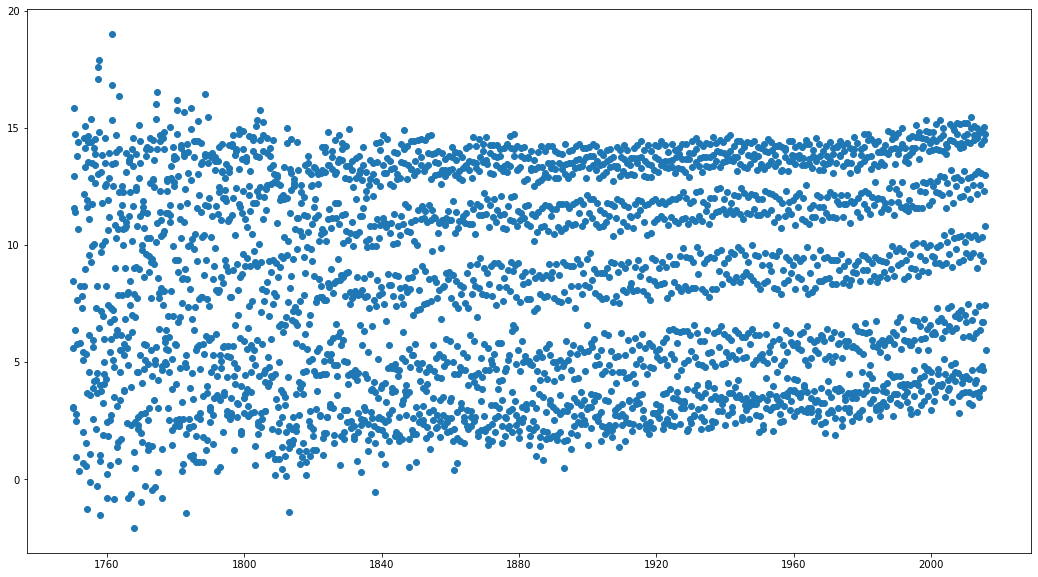

In [47]:
plt.figure(figsize=(18,10))
plt.scatter(data = temperatures, x = 'dt',y = 'LandAverageTemperature')
plt.show()

In [8]:
temperatures['Date'] = pd.to_datetime(temperatures.dt, format='%Y-%d-%m')
temperatures['Year'] = temperatures['Date'].dt.year
temperatures['Date'] = temperatures['Date'].map(dt.datetime.toordinal)

In [9]:
df = temperatures.groupby('Year')['LandAverageTemperature'].mean().reset_index()

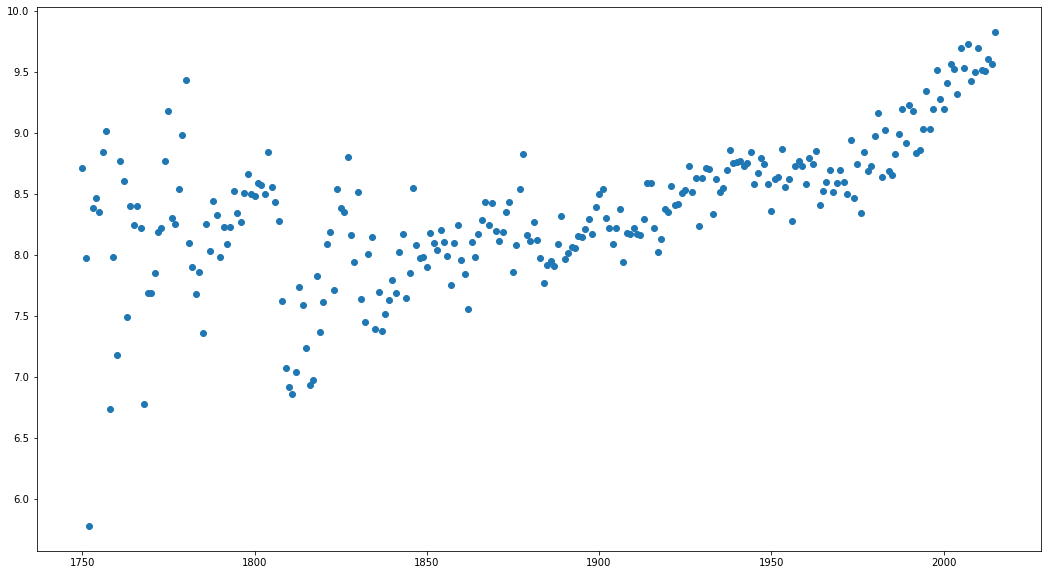

In [10]:
plt.figure(figsize=(18,10))
plt.scatter(data = df, x = 'Year',y = 'LandAverageTemperature')
plt.show()

# <a id="3">Trends</a>

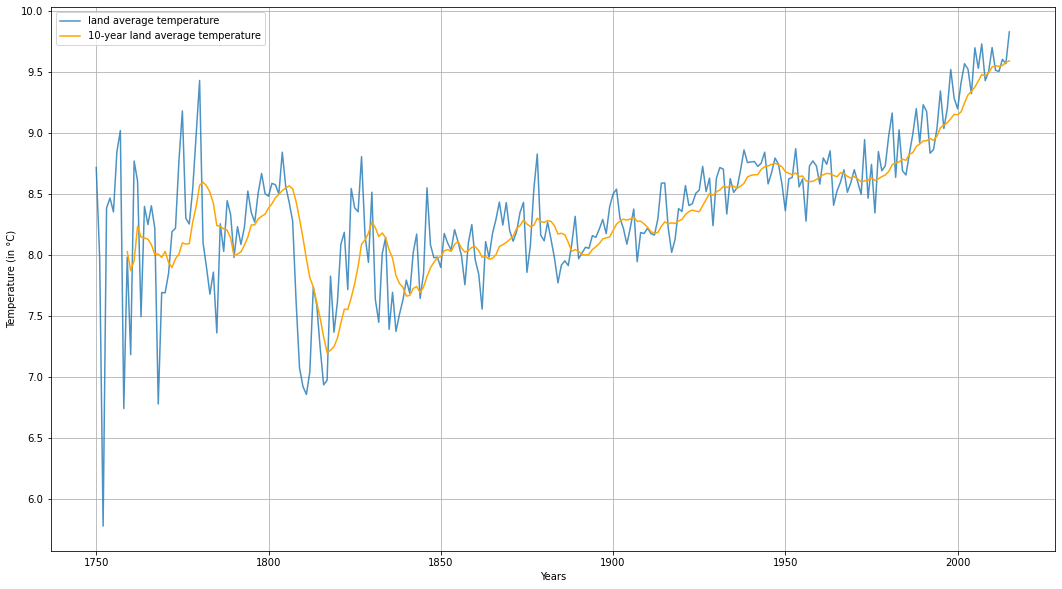

<Figure size 432x288 with 0 Axes>

In [11]:
temperature_px = df['LandAverageTemperature']
df['10'] = temperature_px.rolling(window=10).mean()

plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.plot(df['LandAverageTemperature'], alpha=0.8, label='land average temperature')
ax.plot(df['10'], color="orange", label='10-year land average temperature')
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.grid()
plt.legend()
plt.show()
plt.clf()

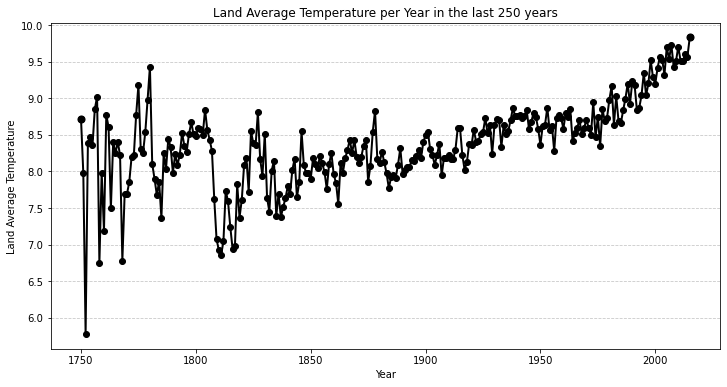

In [12]:
plot_params = {'color': 'black', 'linewidth': 2, 'linestyle': '-', 'marker': 'o', 'markersize': 6, 'markerfacecolor': 'black'}
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['LandAverageTemperature'], **plot_params)
ax.set(title="Land Average Temperature per Year in the last 250 years",
       ylabel="Land Average Temperature",
       xlabel="Year")
ax.set_xticks(range(0, 251, 50))
ax.set_xticklabels([1750, 1800, 1850, 1900, 1950, 2000])
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.scatter(df.index[0], df['LandAverageTemperature'].iloc[0], color='black', s=50)
ax.scatter(df.index[-1], df['LandAverageTemperature'].iloc[-1], color='black', s=50)
plt.show()


## <a id="3.1">Create a Trend Feature</a>

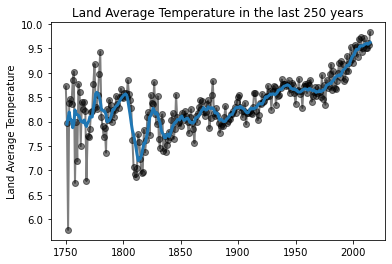

In [13]:
trend = df['LandAverageTemperature'].rolling(
    window=10,
    center=True,
    min_periods=6,
).mean()

ax = df['LandAverageTemperature'].plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)
ax.set(title="Land Average Temperature in the last 250 years", ylabel="Land Average Temperature")
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.show()

In [14]:
from statsmodels.tsa.deterministic import DeterministicProcess

average_temperature = temperatures.groupby('Year').mean()['LandAverageTemperature']
y = average_temperature.copy()  # the target

dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=90)

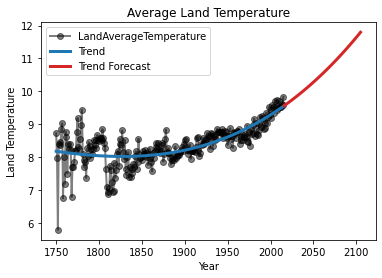

In [15]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Land Temperature", ylabel="Land Temperature")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

# <a id="4">Linear Regression</a>

## <a id="4.1">Data from 1750 - 2015</a>

In [16]:
corr, p = pearsonr(df['Year'], df['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.6223364823755806


Strong positive correlation

In [17]:
lr = LinearRegression()

In [18]:
X = df['Year']
y = df['LandAverageTemperature']

X = X.values.reshape(-1,1)

In [19]:
lr.fit(X, y)

LinearRegression()

In [20]:
y_pred = lr.predict(X)

In [21]:
years = pd.DataFrame(X)

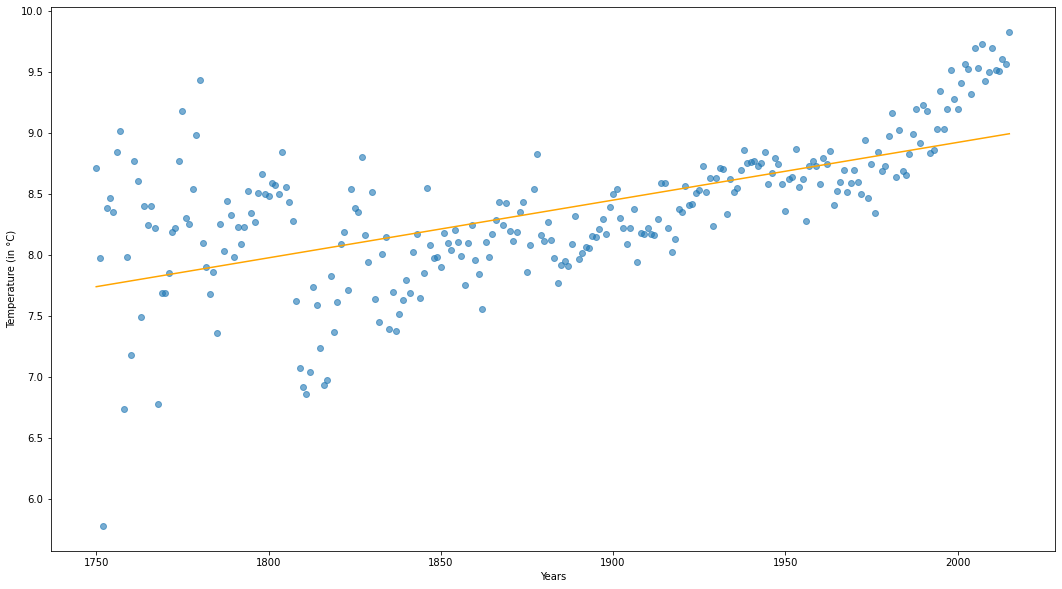

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [23]:
print(lr.coef_)
print(10 * lr.coef_)

[0.00473169]
[0.04731692]


In [53]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[ 9.85627013 10.22660503]


#### Interpretation

Every year, the average land temperature increases by an average of 0.0047 °C. Every ten years, the average land temperature increases by an average of 0.0473 °C.
The average land temperature in 2030 will be 9.067 °C and in 2050 9.162 °C.

## <a id="4.2">Data from 1850 - 2015</a>

In [25]:
corr, p = pearsonr(df[df['Year'] >= 1850]['Year'], df[df['Year'] >= 1850]['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.8656819312510894


Very strong positive correlation

In [26]:
lr = LinearRegression()

In [27]:
X = df[df['Year'] >= 1850]['Year']
y = df[df['Year'] >= 1850]['LandAverageTemperature']

X = X.values.reshape(-1,1)

In [28]:
lr.fit(X, y)

LinearRegression()

In [29]:
y_pred = lr.predict(X)

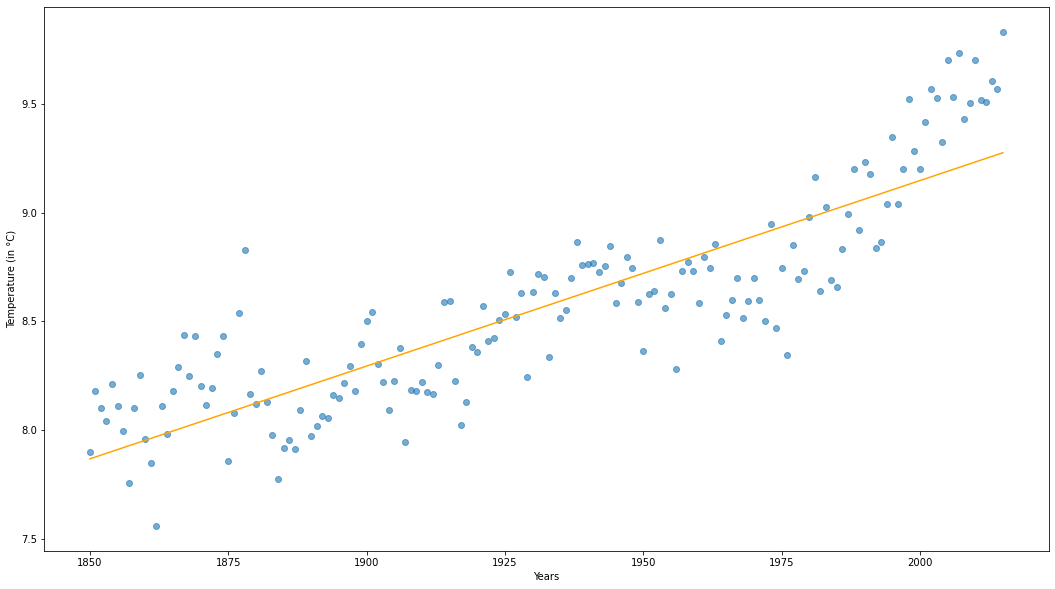

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [31]:
print(lr.coef_)
print(10 * lr.coef_)

[0.00853155]
[0.08531553]


In [32]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[9.40340929 9.57404036]


#### Interpretation

Every year, the average land temperature increases by an average of 0.0085 °C. Every ten years, the average land temperature increases by an average of 0.0853 °C.
The average land temperature in 2030 will be 9.403 °C and in 2050 9.574 °C.

## <a id="4.3">Data from 1950 - 2015</a>

In [33]:
corr, p = pearsonr(df[df['Year'] >= 1950]['Year'], df[df['Year'] >= 1950]['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.8698038878923113


Very strong positive correlation

In [34]:
lr = LinearRegression()

In [35]:
X = df[df['Year'] >= 1950]['Year']
y = df[df['Year'] >= 1950]['LandAverageTemperature']

X = X.values.reshape(-1,1)

In [36]:
lr.fit(X, y)

LinearRegression()

In [37]:
y_pred = lr.predict(X)

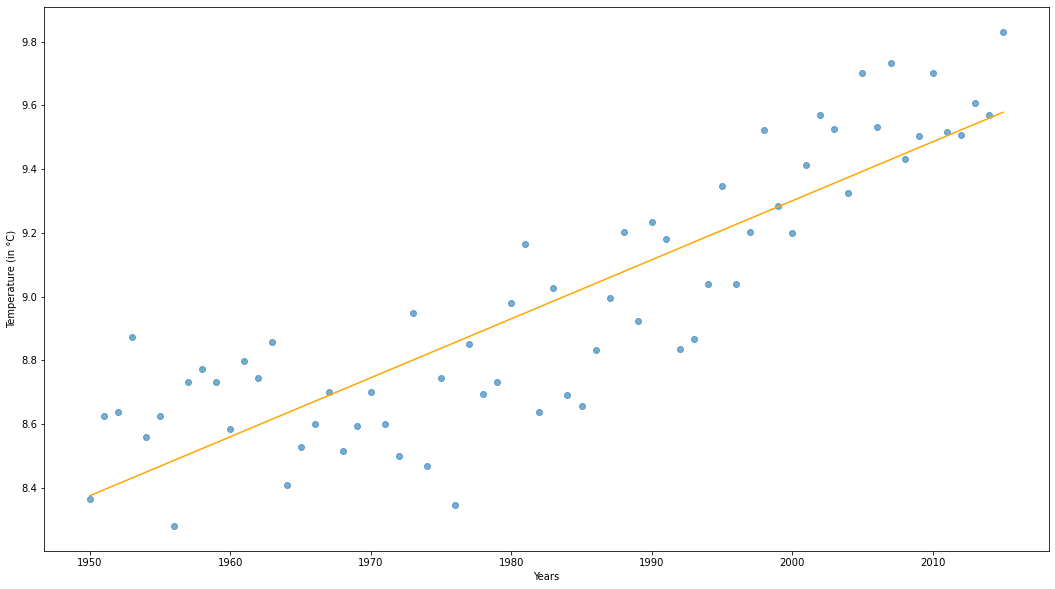

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [39]:
print(lr.coef_)
print(lr.coef_ * 10)

[0.01851674]
[0.18516745]


In [51]:
print(lr.predict(np.array([2030, 2050]).reshape(-1,1)))

[ 9.85627013 10.22660503]


#### Interpretation

Every year, the average land temperature increases by an average of 0.0185 °C. Every ten years, the average land temperature increases by an average of 0.1852 °C.
The average land temperature in 2030 will be 9.856 °C and in 2050 10.227 °C.